# EDA Assignment - Movie

In [1]:
# load libraries
import pandas as pd
import numpy as np

In [2]:
# read movies data
df = pd.read_csv('./dataset/Movie.csv')
df.head()

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


In [3]:
df.describe()

,userId,rating
count,8992.000000,8992.000000
mean,3521.880116,3.557162
std,2012.497384,0.967071
min,1.000000,0.500000
25%,1779.000000,3.000000
50%,3530.000000,3.500000
75%,5213.250000,4.000000
max,7120.000000,5.000000


In [4]:
df.dtypes

userId      int64
movie      object
rating    float64
dtype: object

In [5]:
# summary of the data: column names, total no.of non-null values, data types, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8992 entries, 0 to 8991
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userId  8992 non-null   int64  
 1   movie   8992 non-null   object 
 2   rating  8992 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.9+ KB


In [6]:
df.shape

(8992, 3)

## Duplicates

In [7]:
# count of duplicate rows
df[df.duplicated()].shape

(0, 3)

##### no duplicates rows found hence, no need to use drop duplicate function

## Outlier detection

### Bar graph

<Axes: xlabel='userId'>

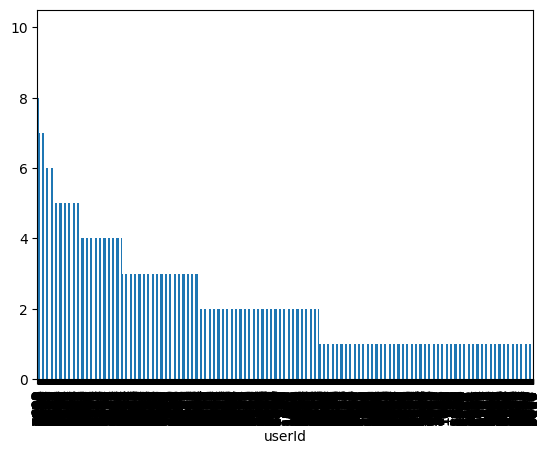

In [8]:
df['userId'].value_counts().plot.bar()

<Axes: xlabel='movie'>

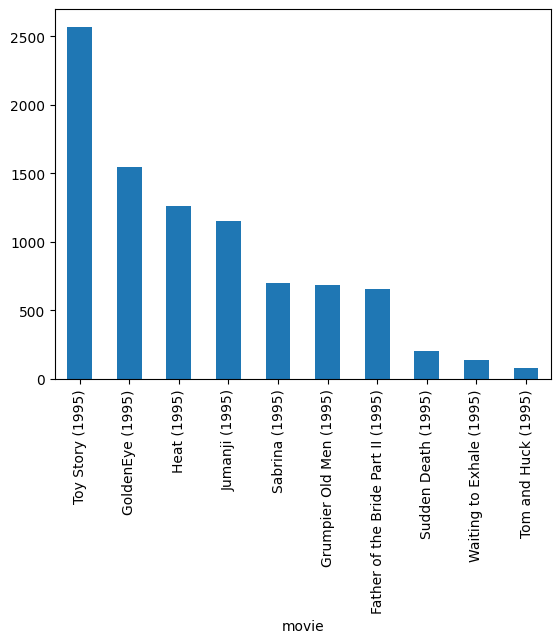

In [9]:
df['movie'].value_counts().plot.bar()

<Axes: xlabel='rating'>

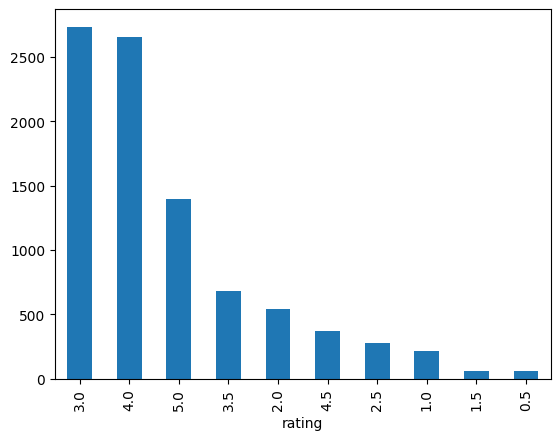

In [10]:
df['rating'].value_counts().plot.bar()

### Boxplot

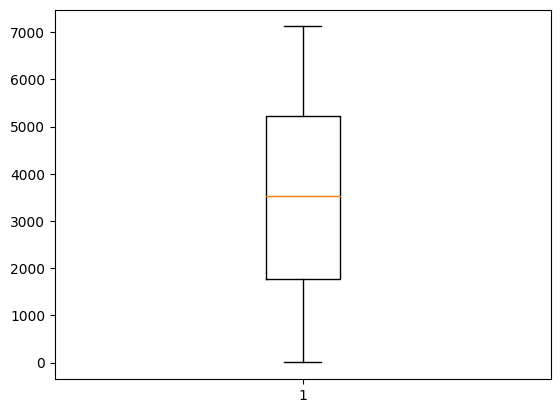

In [11]:
# import maxplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

data = df
data_box = data.dropna()
data_box1 = data_box.userId
box1 = plt.boxplot(data_box1)

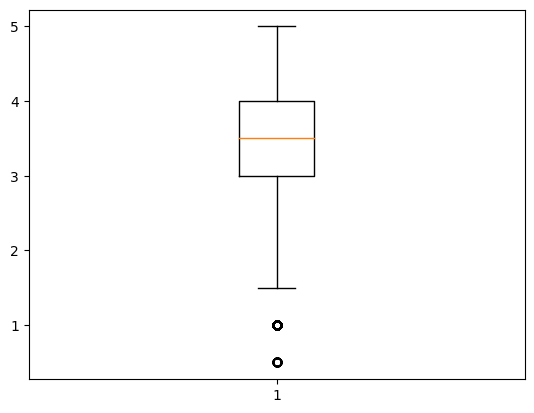

In [12]:
data_box2 = data_box.rating
box2 = plt.boxplot(data_box2)

In [13]:
# To get the whiskers# To get the whiskers
[item.get_ydata()[1] for item in box1['whiskers']]

[1.0, 7120.0]

In [14]:
[item.get_ydata()[1] for item in box2['whiskers']]

[1.5, 5.0]

## Missing values and Imputation

<Axes: >

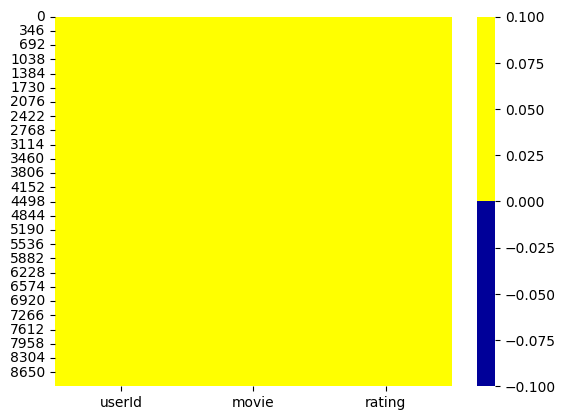

In [15]:
import seaborn as sns

cols = data.columns
colors = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colors))

In [16]:
data[data.isnull().any(axis=1)].sum()

userId      0
movie       0
rating    0.0
dtype: object

#### We have 0 null values so we do not need Mean Imputation

## Scatter plot and Correlation

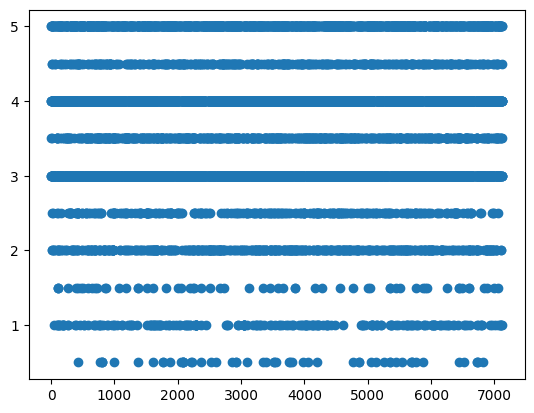

In [17]:
plt.scatter(df['userId'], df['rating'])
plt.show()

C:\Users\rahul bhutekar\ds_class\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


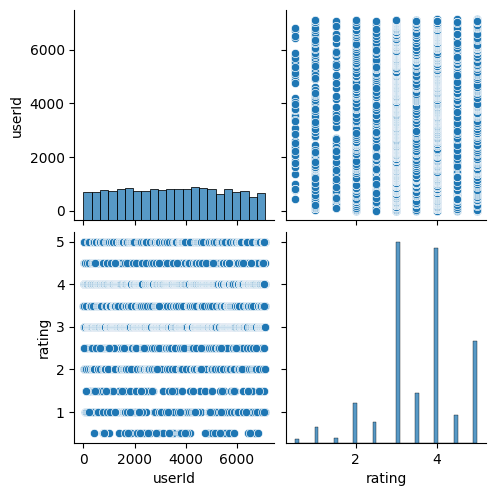

In [18]:
# Create the default pairplot
sns.pairplot(data)

<Axes: xlabel='userId', ylabel='rating'>

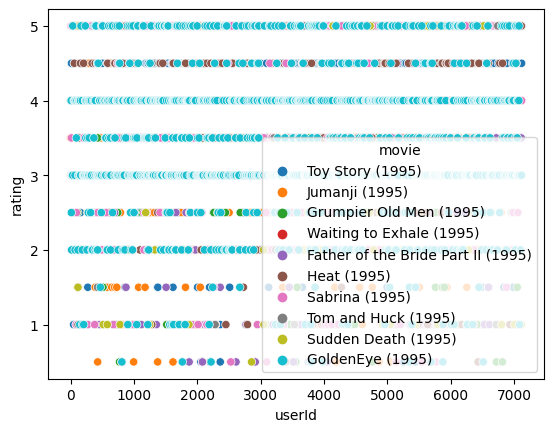

In [21]:
sns.scatterplot(data, x='userId', y='rating', hue='movie')

## Transformation - Dummy variabe 

In [22]:
# generating dummy values for 'movie' column
data_cleaned = pd.get_dummies(data, columns=['movie'])
data_cleaned

,userId,rating,movie_Father of the Bride Part II (1995),movie_GoldenEye (1995),movie_Grumpier Old Men (1995),movie_Heat (1995),movie_Jumanji (1995),movie_Sabrina (1995),movie_Sudden Death (1995),movie_Tom and Huck (1995),movie_Toy Story (1995),movie_Waiting to Exhale (1995)
0,3,4.0,False,False,False,False,False,False,False,False,True,False
1,6,5.0,False,False,False,False,False,False,False,False,True,False
2,8,4.0,False,False,False,False,False,False,False,False,True,False
3,10,4.0,False,False,False,False,False,False,False,False,True,False
4,11,4.5,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8987,7087,3.0,False,True,False,False,False,False,False,False,False,False
8988,7088,1.0,False,True,False,False,False,False,False,False,False,False
8989,7105,2.0,False,True,False,False,False,False,False,False,False,False
8990,7113,3.0,False,True,False,False,False,False,False,False,False,False


In [23]:
# correlation
data_cleaned.corr()

,userId,rating,movie_Father of the Bride Part II (1995),movie_GoldenEye (1995),movie_Grumpier Old Men (1995),movie_Heat (1995),movie_Jumanji (1995),movie_Sabrina (1995),movie_Sudden Death (1995),movie_Tom and Huck (1995),movie_Toy Story (1995),movie_Waiting to Exhale (1995)
userId,1.000000,-0.005597,-0.014442,-0.004785,0.008416,0.003892,-0.000316,0.007996,-0.012836,-0.010645,0.002158,0.015116
rating,-0.005597,1.000000,-0.120002,-0.061380,-0.109962,0.116613,-0.114637,-0.052801,-0.084627,-0.019791,0.263014,-0.071931
movie_Father of the Bride Part II (1995),-0.014442,-0.120002,1.000000,-0.128030,-0.080622,-0.113336,-0.107782,-0.081574,-0.042561,-0.026263,-0.177559,-0.035051
movie_GoldenEye (1995),-0.004785,-0.061380,-0.128030,1.000000,-0.130950,-0.184086,-0.175065,-0.132496,-0.069130,-0.042657,-0.288400,-0.056931
movie_Grumpier Old Men (1995),0.008416,-0.109962,-0.080622,-0.130950,1.000000,-0.115921,-0.110240,-0.083434,-0.043532,-0.026862,-0.181609,-0.035850
movie_Heat (1995),0.003892,0.116613,-0.113336,-0.184086,-0.115921,1.000000,-0.154973,-0.117289,-0.061196,-0.037762,-0.255301,-0.050398
movie_Jumanji (1995),-0.000316,-0.114637,-0.107782,-0.175065,-0.110240,-0.154973,1.000000,-0.111541,-0.058197,-0.035911,-0.242789,-0.047928
movie_Sabrina (1995),0.007996,-0.052801,-0.081574,-0.132496,-0.083434,-0.117289,-0.111541,1.000000,-0.044045,-0.027179,-0.183752,-0.036273
movie_Sudden Death (1995),-0.012836,-0.084627,-0.042561,-0.069130,-0.043532,-0.061196,-0.058197,-0.044045,1.000000,-0.014181,-0.095873,-0.018926
movie_Tom and Huck (1995),-0.010645,-0.019791,-0.026263,-0.042657,-0.026862,-0.037762,-0.035911,-0.027179,-0.014181,1.000000,-0.059159,-0.011678


# Transformations

## Normalization

In [24]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8992 entries, 0 to 8991
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   userId                                    8992 non-null   int64  
 1   rating                                    8992 non-null   float64
 2   movie_Father of the Bride Part II (1995)  8992 non-null   bool   
 3   movie_GoldenEye (1995)                    8992 non-null   bool   
 4   movie_Grumpier Old Men (1995)             8992 non-null   bool   
 5   movie_Heat (1995)                         8992 non-null   bool   
 6   movie_Jumanji (1995)                      8992 non-null   bool   
 7   movie_Sabrina (1995)                      8992 non-null   bool   
 8   movie_Sudden Death (1995)                 8992 non-null   bool   
 9   movie_Tom and Huck (1995)                 8992 non-null   bool   
 10  movie_Toy Story (1995)              

In [25]:
data_cleaned.values

array([[3, 4.0, False, ..., False, True, False],
       [6, 5.0, False, ..., False, True, False],
       [8, 4.0, False, ..., False, True, False],
       ...,
       [7105, 2.0, False, ..., False, False, False],
       [7113, 3.0, False, ..., False, False, False],
       [7117, 3.0, False, ..., False, False, False]], dtype=object)

##### standarizing all movie columns

In [26]:
# standarize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned.iloc[:,1:])
scaled_data

array([[ 0.45794231, -0.28075654, -0.45601833, ..., -0.09354293,
         1.58120038, -0.12484461],
       [ 1.49205012, -0.28075654, -0.45601833, ..., -0.09354293,
         1.58120038, -0.12484461],
       [ 0.45794231, -0.28075654, -0.45601833, ..., -0.09354293,
         1.58120038, -0.12484461],
       ...,
       [-1.6102733 , -0.28075654,  2.19289433, ..., -0.09354293,
        -0.63243091, -0.12484461],
       [-0.57616549, -0.28075654,  2.19289433, ..., -0.09354293,
        -0.63243091, -0.12484461],
       [-0.57616549, -0.28075654,  2.19289433, ..., -0.09354293,
        -0.63243091, -0.12484461]])

In [27]:
from numpy import set_printoptions

set_printoptions(precision=2)
scaled_data

array([[ 0.46, -0.28, -0.46, ..., -0.09,  1.58, -0.12],
       [ 1.49, -0.28, -0.46, ..., -0.09,  1.58, -0.12],
       [ 0.46, -0.28, -0.46, ..., -0.09,  1.58, -0.12],
       ...,
       [-1.61, -0.28,  2.19, ..., -0.09, -0.63, -0.12],
       [-0.58, -0.28,  2.19, ..., -0.09, -0.63, -0.12],
       [-0.58, -0.28,  2.19, ..., -0.09, -0.63, -0.12]])

# EDA with libraries

In [28]:
# check if a Library is installed or not
!pip show ydata_profiling

Name: ydata-profiling
Version: 4.6.1
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/ydataai/ydata-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: C:\Users\rahul bhutekar\ds_class\Lib\site-packages
Requires: dacite, htmlmin, imagehash, jinja2, matplotlib, multimethod, numba, numpy, pandas, phik, pydantic, PyYAML, requests, scipy, seaborn, statsmodels, tqdm, typeguard, visions, wordcloud
Required-by: 


In [29]:
from ydata_profiling import ProfileReport

report = ProfileReport(df, title="Movie EDA Report")
report.to_file(output_file='eda-movies-report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
report

In [36]:
# check if a Library is installed or not
!pip show sweetviz

Name: sweetviz
Version: 2.2.1
Summary: A pandas-based library to visualize and compare datasets.
Home-page: 
Author: 
Author-email: Francois Bertrand <fb@fbdesignpro.com>
License: MIT License

Copyright (c) 2020 fbdesignpro

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT

In [37]:
import sweetviz as sv

sweet_report = sv.analyze(df)
sweet_report.show_html('eda-movies-sweetviz-report.html')

                                             |                                             | [  0%]   00:00 ->…

Report eda-movies-sweetviz-report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



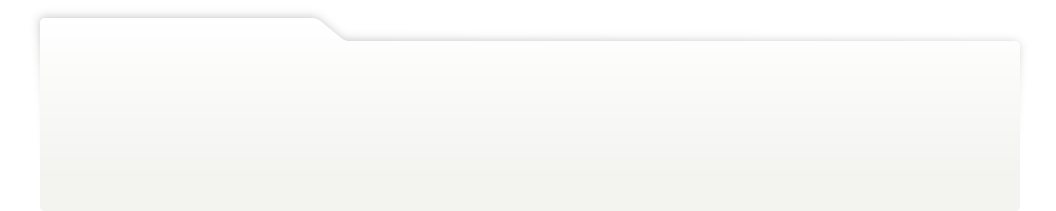
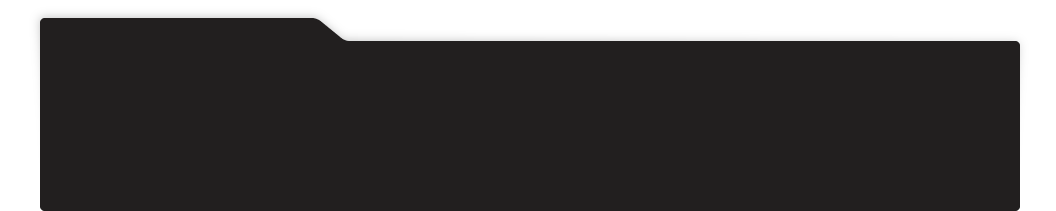
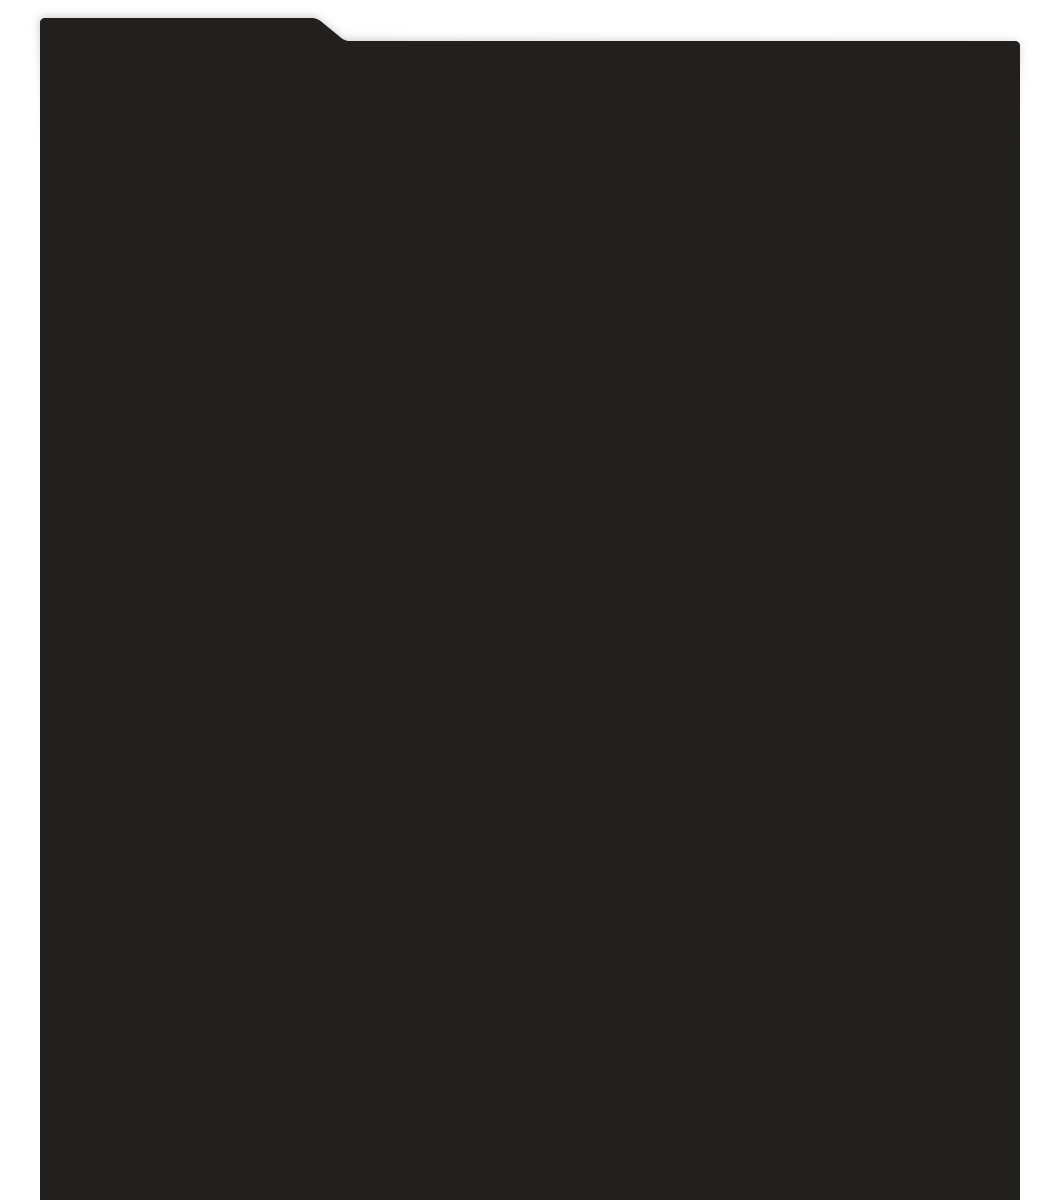
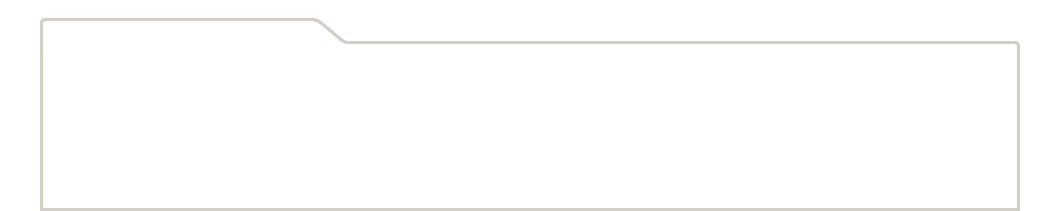
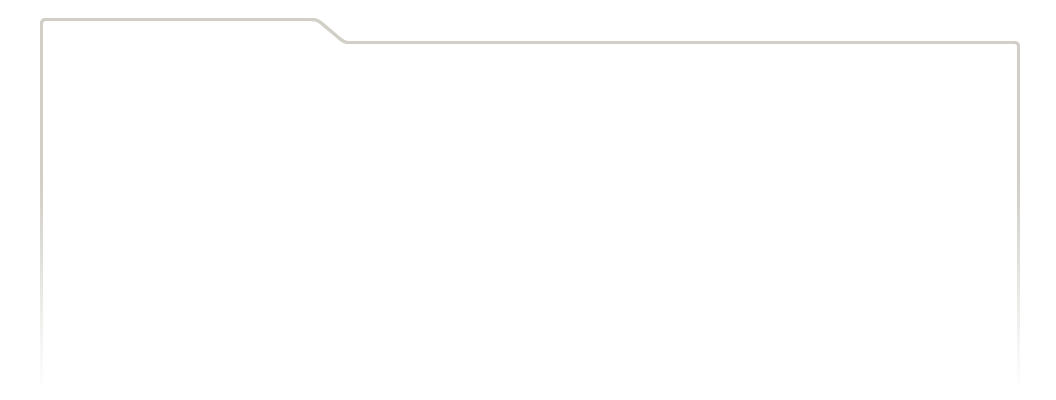
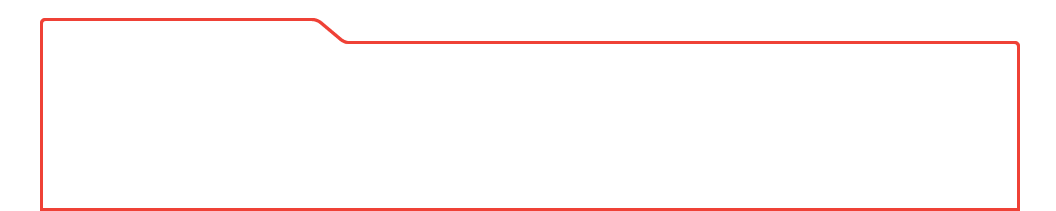
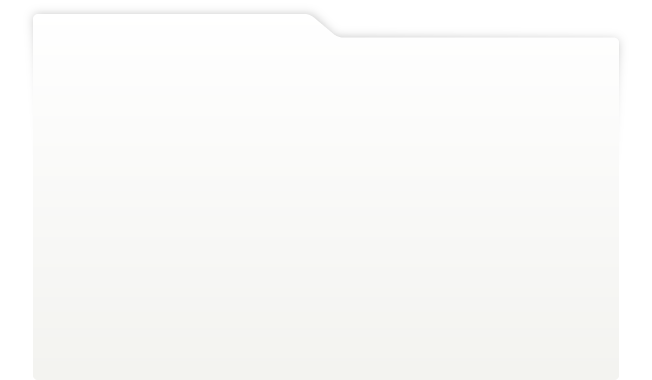
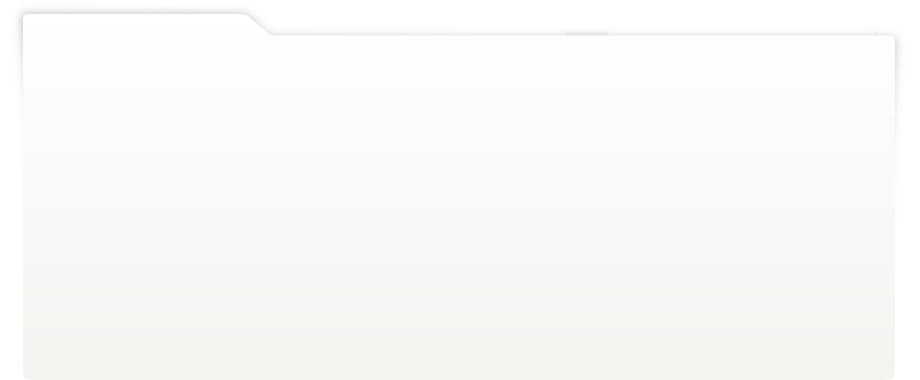
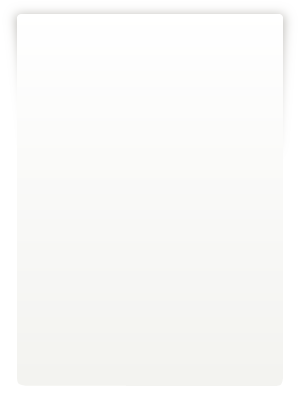
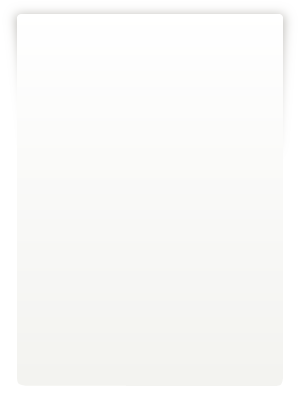
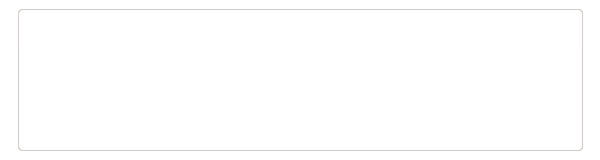
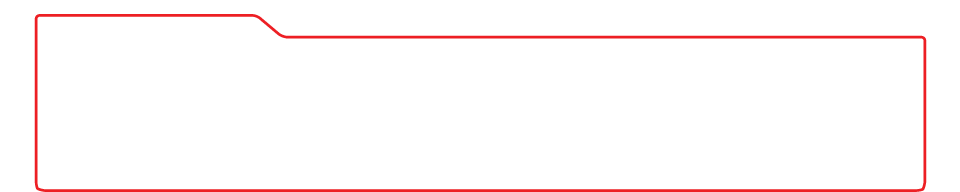
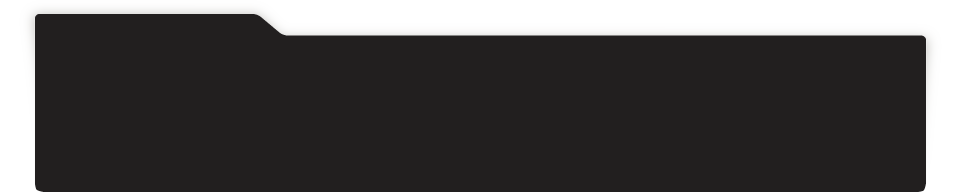
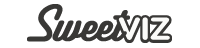
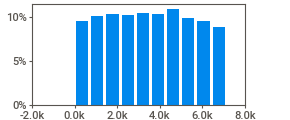
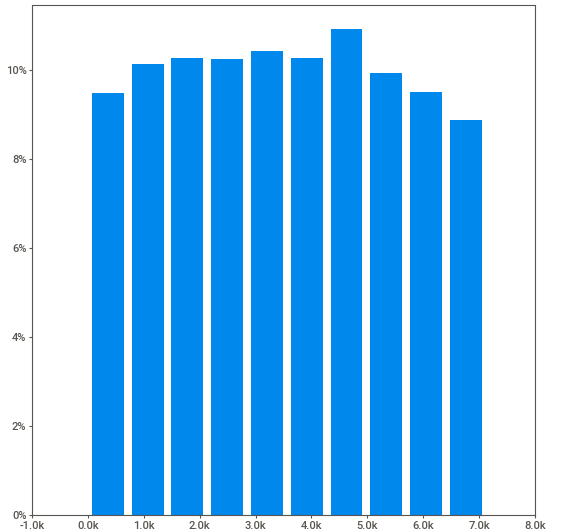
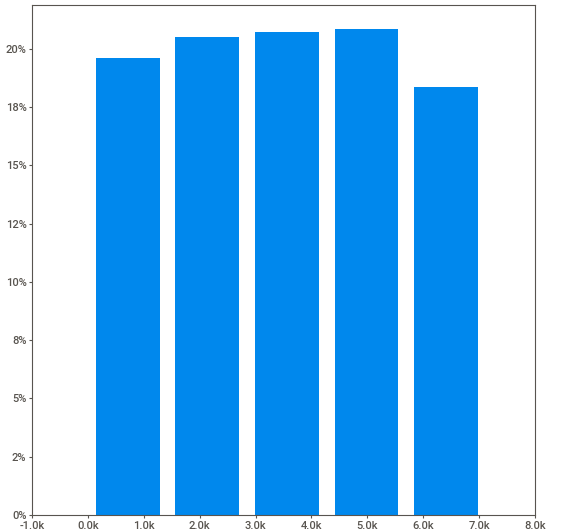
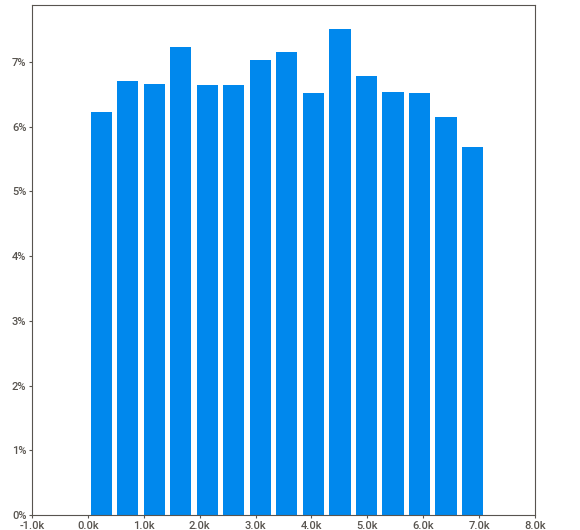
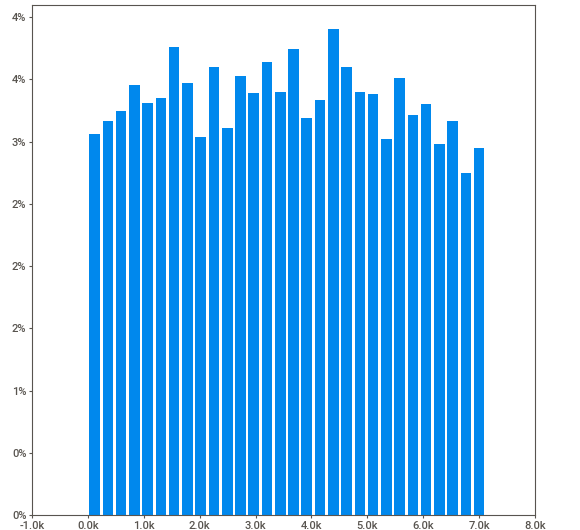
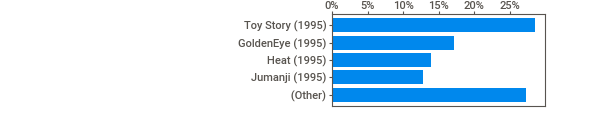
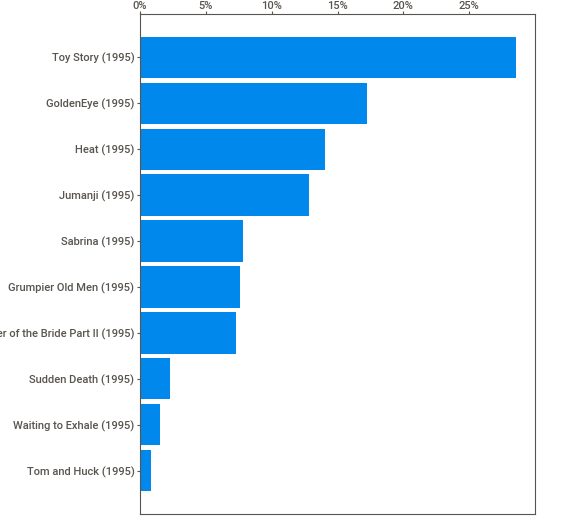
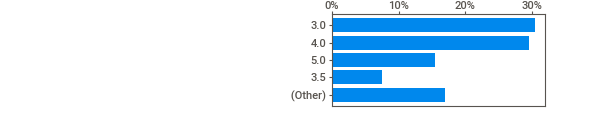
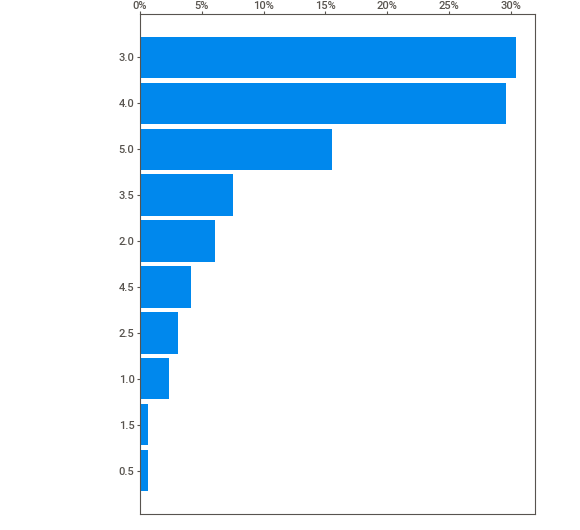
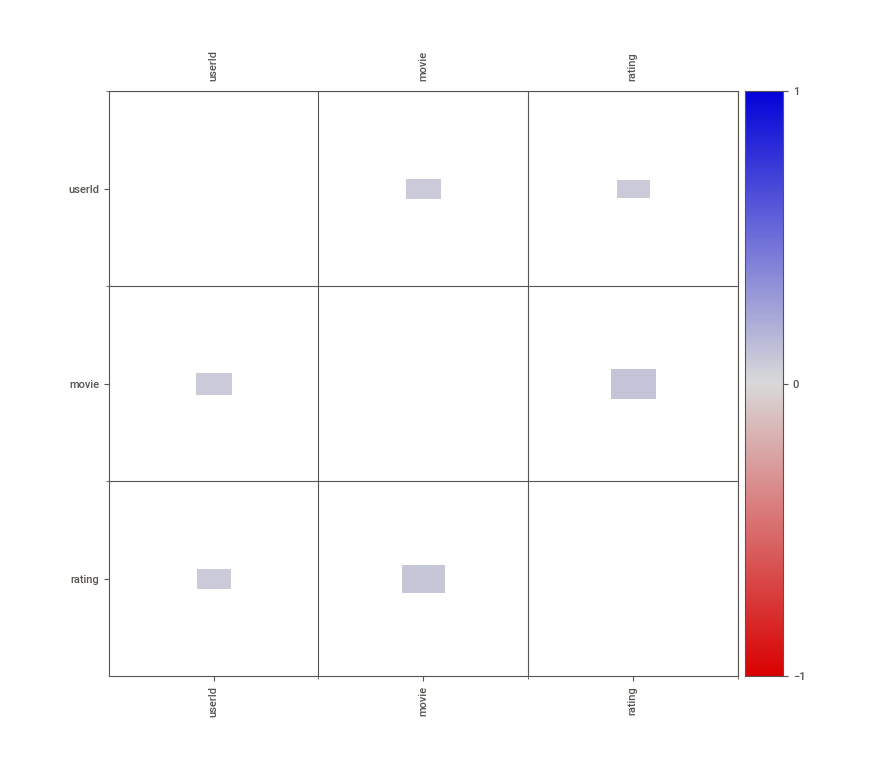
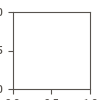

Report './eda-movies-sweetviz-report.html' was saved to storage.


In [38]:
# to display the sweetviz report in the notebook
sweet_report.show_notebook(  w='100%', 
                             h=530, 
                             scale=None,
                             layout='widescreen',
                             filepath='./eda-movies-sweetviz-report.html' )